# Toppers

In [1]:
%matplotlib notebook

import datetime
from pathlib import Path
import sqlite3

import pandas as pd

db_filename = f'{Path.home()}/var/trader/db/trader.db'
connection = sqlite3.connect(db_filename)

In [2]:
start_date = '2020-01-01'
reference_date = '2021-01-01'
yesterday_date = datetime.date.today() - datetime.timedelta(days=1)

print(f'Yesterday: {yesterday_date}')

Yesterday: 2021-09-26


In [3]:
query = f'''
  SELECT d.timestamp,
         m.market,
         s.close,
         d.close,
         d.volume,
         round(100 * d.close / s.close, 1) AS idx,
         round(d.close * d.volume / 100000, 1) AS total
    FROM market_daily_prices AS d
    JOIN markets AS m
          ON m.id = d.market_id
    JOIN market_daily_prices AS s
          ON d.market_id = s.market_id
         AND s.timestamp = strftime('%s', '{reference_date}')
   WHERE d.timestamp = strftime('%s', '{yesterday_date}')
     AND total >= 50
ORDER BY idx DESC
'''

df = pd.read_sql(query, connection, parse_dates={'timestamp': 's', 'created_on': 's', 'updated_on': 's'})
df

,timestamp,market,close,close,volume,idx,total
0,2021-09-26,ADA-EUR,0.143530,1.88030,1.226010e+07,1310.0,230.5
1,2021-09-26,VET-EUR,0.015573,0.07761,1.316479e+08,498.4,102.2
2,2021-09-26,ETH-EUR,598.330000,2596.10000,7.604088e+03,433.9,197.4
3,2021-09-26,XRP-EUR,0.195640,0.80477,1.131532e+07,411.4,91.1
4,2021-09-26,BTC-EUR,24047.000000,36847.00000,4.527654e+02,153.2,166.8


<IPython.core.display.Javascript object>


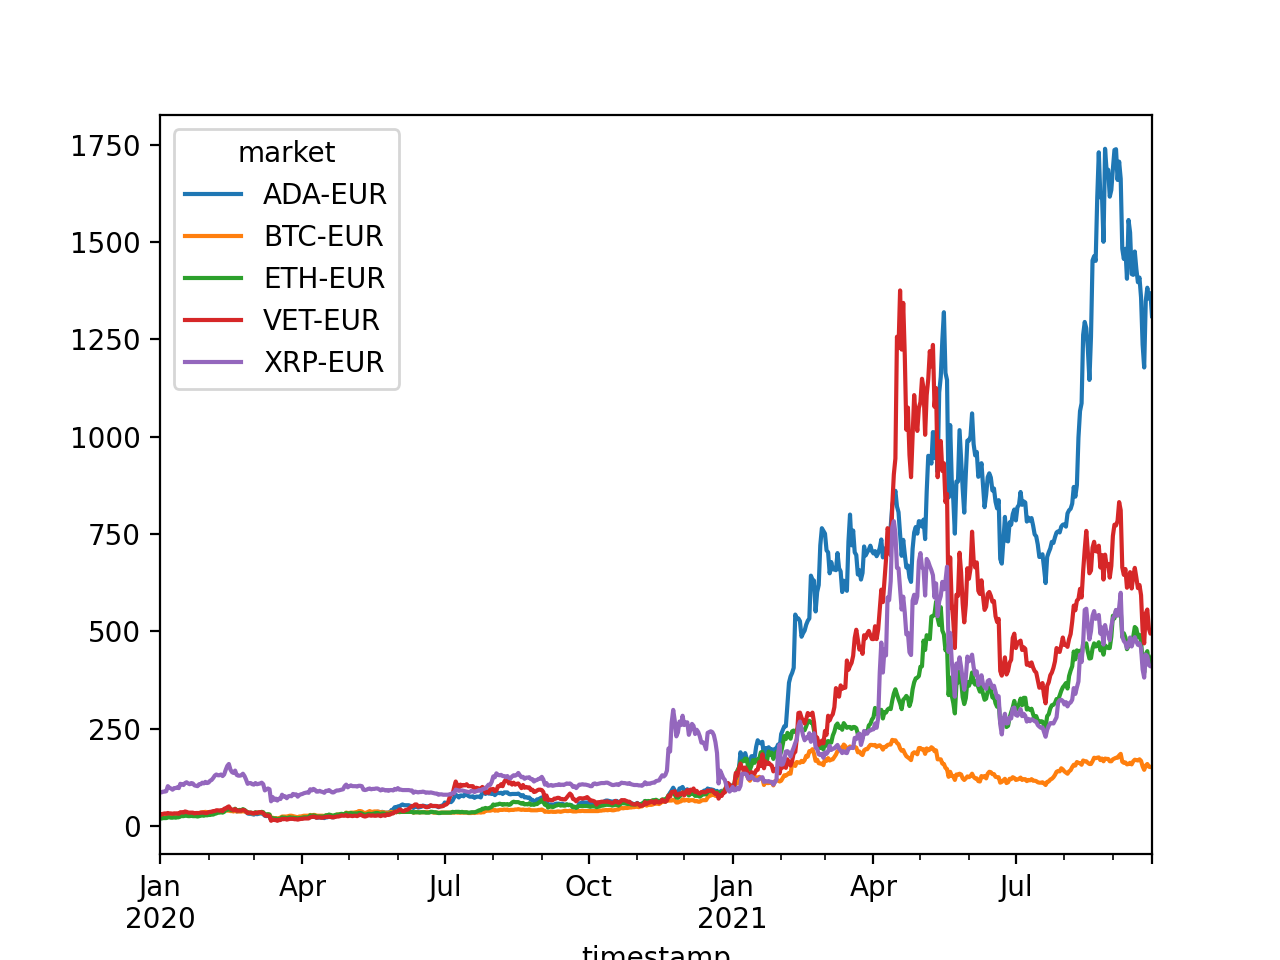

<AxesSubplot:xlabel='timestamp'>

In [5]:
query = f'''
SELECT d.timestamp,
       m.market,
       round(100 * d.close / s.close) AS idx
  FROM market_daily_prices AS d
  JOIN markets AS m
        ON m.id = d.market_id
  JOIN market_daily_prices AS s
        ON d.market_id = s.market_id
       AND s.timestamp = strftime('%s', '{reference_date}')
 WHERE m.market IN ('ADA-EUR', 'XRP-EUR', 'ETH-EUR', 'BTC-EUR', 'VET-EUR')
   AND d.timestamp >= strftime('%s', '{start_date}')
'''

df = pd.read_sql(query, connection, index_col='timestamp', parse_dates={'timestamp': 's', 'created_on': 's', 'updated_on': 's'})
top = df.pivot(columns='market', values='idx')
top.plot()